In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import OrderedDict
import seaborn as sns
import os
import sys
from datetime import datetime

#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

PCA_COMPLIANCE = {'FULLY COMPLIANT':5,
                  'FULLY COMPLIANT ':5,
                  'FULLY COMPLIANT f':6,
                  'PARTIALLY COMPLIANT':3, 
                  'PARTIALLY COMPLIANT ':3, 
                  'PARTIALLY COMPLIANT f':4, 
                  'NON-COMPLIANT':1, 
                  'NON-COMPLIANT ':1, 
                  'NON-COMPLIANT f':2, 
                  'N/A':7}

SCA_COMPLIANCE = {'0 - n/a':0,
                  '1 - Very Inadequate / Major Non-Conformity':1,
                  '2 - Inadequate / Minor Non-Conformity (high severity)':2,
                  '3 - Partially adequate / Minor Non-Conformity (low severity)':3,
                  '4 - Broadly adequate / Observation':4,
                  '5 - Substantially adequate / Compliant':5}

today = datetime.now().strftime('%d-%m-%Y')

# Reporting Notes
- We need to show a heatmap of the current snapshot
- Heatmap needed for PCA DPIA view i.e 1 , 2 .. 80
- Heatmap needed for PCA Cookbook view i.e. 1H, 2H, 7V .. 80V
- Heatmap per practice for the above heatmaps
- Project code heatmap
- Project reject heatmap

In [3]:
ls

All_REMEDIATION_STATS.xlsx         old RS versions/
Archive Output/                    output_rs/
Archive Responses/                 output_rs (copy)/
compliancy_heatmap_28-04-2018.png  PCA_HEATMAP.xlsx
Compliancy-Heatmap.ipynb           README.md
Convert-RS-2.2.ipynb               REMEDIATION_STATS.xlsx
Convert-RS-3.0.ipynb               RS_FEEDBACK/
Convert-RS-4.ipynb                 RS_responses/
Error Files/                       RS_responses (copy)/
GDPR-SNAPSHOT-28-04-2018.xlsx      Transfer-RS-Responses.ipynb
old_output_rs/                     Transfer-RS-Responses-V2.ipynb


In [4]:
pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx')
sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx')

PRACTICE = 'ALL'

iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]


In [5]:
def return_practice( prod_id ):
    if prod_id in iot_set:
        return 'IoT'
    elif prod_id in cloud_set:
        return 'Cloud'
    elif prod_id in connectivity_set:
        return 'Connectivity'
    elif prod_id in eit_set:
        return 'EIT'
    elif prod_id in uc_set:
        return 'UC'
    else:
        return 'Unknown Practice'

In [6]:
pca_df['Practice'] = pca_df['Product ID'].map(lambda x: return_practice(x))
sca_df['Practice'] = sca_df['Product ID'].map(lambda x: return_practice(x))


In [7]:
pca_df = pca_df[pca_df['Category'] == 'PCA']
sca_df = sca_df[sca_df['Category'] == 'SCA']
sca_df.head()

,Compliance Assessment,Entity Count,Filename,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Product ID,Category,Orphan,Practice
27,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-016",EPS097-SCA-9.2.6-A-A,9.2.6-A,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.6-A,97,SCA,Project Code Allocated,IoT
28,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-016",EPS097-SCA-9.2.6-B-A,9.2.6-B,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.6-B,97,SCA,Project Code Allocated,IoT
29,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-007, (IOT-012)",EPS097-SCA-12.4.3-A,12.4.3,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-12.4.3,97,SCA,Project Code Allocated,IoT
30,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-003, IOT-004, IOT-015, (IOT-008)",EPS097-SCA-13.2.1-A,13.2.1,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-13.2.1,97,SCA,Project Code Allocated,IoT
31,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-014, IOT-015, (IOT-008),...",EPS097-SCA-18.1.4-A,18.1.4,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-18.1.4,97,SCA,Project Code Allocated,IoT


In [8]:
COLS = [67,68,89,90,91,94,97,101,102,103,109,110,43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,126,136,141,128,130,129,198,127,1,2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]
INDEX = ['1H','2H','3H','4H','5H','6V','7V','8H','9V','10V','11H','11V','12H','12V','13aH','13aV','13bH','13bV',
'14H','14V','15V','16V','17V','18H','18V','19V','20H','20V','21V','22V','23V','24V','25V','26V','27V','28V','29H',
'30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H','38V','39H','39V','40H','40V','41H','41V','42H',
'42V','43H','43V','44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V',
'55V','56V','57H','57V','58H','59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V',
'70V','71V','72V','73H','74V','75H','76H','76V','77V','78V','79H','79V','80H']


In [9]:
converter = {'7H':'7V', 1: '1H', 2:'2H', 3:'3H', 5:'5H', 7:'7V', 9:'9V', 11:'11V', 12:'12V', 14:'14V', 15:'15V', 16:'16V',
             17:'17V', 18:'18V', 19:'19V', 20:'20V', 21:'21V', 22:'22V', 23:'23V', 26:'26V', 27:'27V', 28:'28V', 30:'30H', 
             31:'31H', 32:'32V', 35:'35H', 37:'37V', 38:'38V', 40:'40V', 41:'41V', 42:'42V', 43:'43H', 44:'44V', 45:'45V', 46:'46V', 
             47:'47V', 48: '48V', 49: '49V', 50:'50H', 51:'51V', 54:'54V', 57:'57V', 58:'58H', 59:'59V', 60:'60H', 61:'61V', 62:'62V', 63:'63H', 
             66:'66H', 67:'67H', 69:'69V', 70:'70V', 73:'73H', 74:'74V', 75:'75H', 76:'76V', 79:'79V'}

In [10]:
heatmap_df = pd.DataFrame(columns=COLS, index=INDEX)
heatmap_df = heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                         43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                         10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                         126,136,141,128,130,129,198,127,1,
                         2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

In [11]:
SCA_INDEX = ['9.2.1-A',
'9.2.2',
'9.2.3',
'9.2.5',
'9.2.6-A',
'9.2.6-B',
'9.4.1',
'9.4.2',
'12.4.1',
'12.4.3',
'13.1.1-R',
'13.2.1',
'13.2.2',
'14.1.2',
'18.1.4']


In [12]:
sca_heatmap_df = pd.DataFrame(columns=COLS, index=SCA_INDEX)
sca_heatmap_df = sca_heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                                 43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                                 10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                                 126,136,141,128,130,129,198,127,1,
                                 2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

In [13]:
pca_df['Compliance Assessment'].fillna('N/A', inplace=True)

In [14]:
#pca_df[pca_df['Product ID'] == 22]
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2812
NON-COMPLIANT            1583
PARTIALLY COMPLIANT f     678
PARTIALLY COMPLIANT       335
NON-COMPLIANT f           263
N/A                       112
NON-COMPLIANT              58
FULLY COMPLIANT            14
Name: Compliance Assessment, dtype: int64

In [15]:
#pca_df['Req Ref'].str.slice(11, -2)
pca_df['Compliance Assessment'].describe()

count                     5855
unique                       8
top       PARTIALLY COMPLIANT 
freq                      2812
Name: Compliance Assessment, dtype: object

In [16]:
iter_count = 0

for p in COLS:
    prod_filter = pca_df['Product ID'] == p
    prod_df = pca_df[prod_filter]
    for r in prod_df['Req Ref']:
        pca = r[11:-2]
        #print("PCA ref: {0}".format(pca))
        if pca in INDEX:
            iter_count = iter_count + 1
            compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)
                        
            if compliance_value == 0:
                print("1: Compliance Value: {0}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                sys.exit("EXIT") # using this as an assert.
                
            if p == 22:
                if r == '57V':
                    print("CHECK: compliance_value = {0}".format(compliance_value))
                    print("CHECK: Req Ref = {0:s}".format(prod_df[prod_df['Req Ref'] == r]['Req Ref'].iloc[0]))
            # check against the PCA_COMPLIANCE and lowest number wins
            # What this is doing? It's overwriting the PCA heatmap cell with the worst case in the
            # case of multiple entities.
            if PCA_COMPLIANCE.get(heatmap_df.loc[pca][p], 10) >= compliance_value:
                heatmap_df.loc[pca][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            else:
                print("2: Compliance Value: {0:s}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                print("2: Heatmap Value: {0:s}".format(heatmap_df.loc[pca][p]))
                #sys.exit("EXIT")
        else:
            if r in converter.keys():
                compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

                if compliance_value == 0:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    sys.exit("EXIT") # using this as an assert.
                    
                if PCA_COMPLIANCE.get(heatmap_df.loc[pca][p], 10) > compliance_value:
                    heatmap_df.loc[converter.get(pca)][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                #else:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    #print("Heatmap Value: {0:s}".format(heatmap_df.loc[r][p]))
                    #sys.exit("EXIT")
            else:
                print("Req nr not in index: {0}".format(pca))
                if pca == 13:
                    if PCA_COMPLIANCE.get(heatmap_df.loc[pca][p], 10) > compliance_value:
                        heatmap_df.loc['13aV'][p] = prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]
                        heatmap_df.loc['13bV'][p] = prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]
                    
print("iter_count: {0}".format(iter_count))            

2: Compliance Value: N/A
2: Heatmap Value: NON-COMPLIANT 
2: Compliance Value: N/A
2: Heatmap Value: NON-COMPLIANT f
2: Compliance Value: N/A
2: Heatmap Value: NON-COMPLIANT 
2: Compliance Value: N/A
2: Heatmap Value: NON-COMPLIANT 
2: Compliance Value: N/A
2: Heatmap Value: NON-COMPLIANT f
2: Compliance Value: N/A
2: Heatmap Value: NON-COMPLIANT f
2: Compliance Value: N/A
2: Heatmap Value: NON-COMPLIANT 
2: Compliance Value: FULLY COMPLIANT
2: Heatmap Value: NON-COMPLIANT 
iter_count: 5842


In [17]:
#heatmap_df.loc['31H'][22]
#PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0])

In [18]:
prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]

u'PARTIALLY COMPLIANT f'

In [19]:
heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,NaN,PARTIALLY COMPLIANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NON-COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NaN,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT
2H,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NaN,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,...,NON-COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT,PARTIALLY COMPLIANT,NaN,NON-COMPLIANT,PARTIALLY COMPLIANT,NaN
3H,PARTIALLY COMPLIANT,NaN,NaN,NaN,NaN,NaN,NaN,PARTIALLY COMPLIANT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4H,NaN,NaN,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,...,NaN,PARTIALLY COMPLIANT,NaN,NaN,NaN,NaN,NaN,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT
5H,NaN,NaN,NaN,PARTIALLY COMPLIANT,NaN,NaN,PARTIALLY COMPLIANT,NaN,NaN,NaN,...,NaN,PARTIALLY COMPLIANT f,NaN,NaN,PARTIALLY COMPLIANT,NaN,NaN,PARTIALLY COMPLIANT,NaN,NaN


In [20]:
#Create Heatmap for SNS (convert to numbers)
input_heatmap = heatmap_df.copy()
input_heatmap.fillna('OoS', inplace=True)
input_heatmap.replace(to_replace='OoS', value=0, inplace=True)
input_heatmap.replace(to_replace='N/A', value=1, inplace=True)
input_heatmap.replace(to_replace='FULLY COMPLIANT', value=2, inplace=True)
input_heatmap.replace(to_replace='FULLY COMPLIANT ', value=2, inplace=True)
input_heatmap.replace(to_replace='PARTIALLY COMPLIANT f', value=3, inplace=True)
input_heatmap.replace(to_replace='PARTIALLY COMPLIANT', value=4, inplace=True)
input_heatmap.replace(to_replace='PARTIALLY COMPLIANT ', value=4, inplace=True)
input_heatmap.replace(to_replace='NON-COMPLIANT f', value=5, inplace=True)
input_heatmap.replace(to_replace='NON-COMPLIANT', value=6, inplace=True)
input_heatmap.replace(to_replace='NON-COMPLIANT ', value=6, inplace=True)


In [21]:
input_heatmap.tail()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
77V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79H,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80H,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


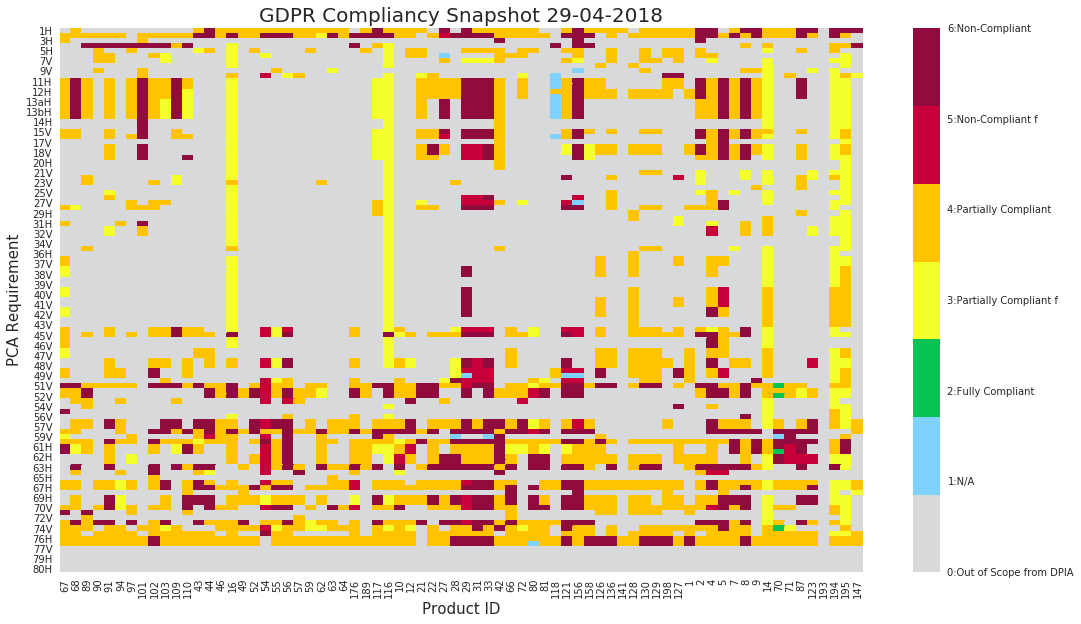

In [22]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap(['#D8D9DA','#80D2FE',
                     '#06C454',
                     '#F5FF2B',
                     '#FFC300',
                     '#C70039',
                     '#900C3F'])
zx = sns.heatmap(input_heatmap, ax=ax, square=False, cmap=cmap)
title = "GDPR Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(['0:Out of Scope from DPIA',
                     '1:N/A', 
                     '2:Fully Compliant', 
                     '3:Partially Compliant f',
                     '4:Partially Compliant', 
                     '5:Non-Compliant f', 
                     '6:Non-Compliant'])

In [23]:
f.savefig("compliancy_heatmap_"+today+".png")

In [26]:
# create subplots
iot_heatmap = input_heatmap[iot_cols]
cloud_heatmap = input_heatmap[cloud_cols]

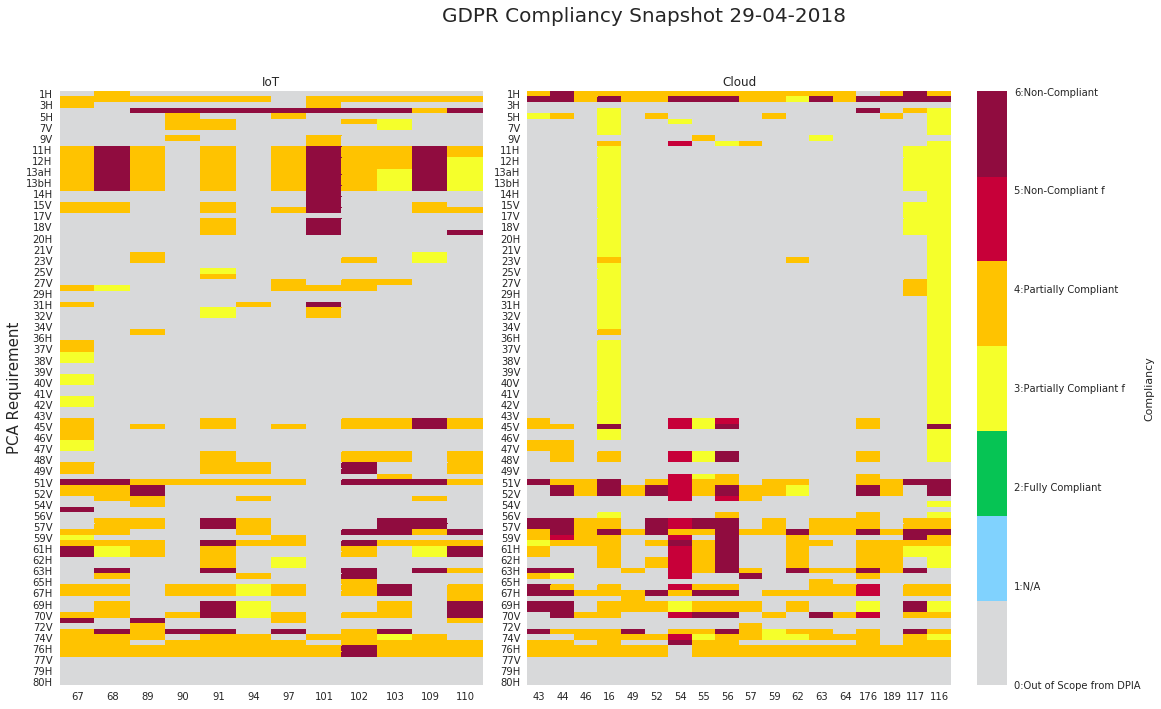

In [80]:
f, (ax, ax1) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(18, 10), gridspec_kw={"width_ratios":[0.8,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

cmap=mcolors.ListedColormap(['#D8D9DA','#80D2FE',
                     '#06C454',
                     '#F5FF2B',
                     '#FFC300',
                     '#C70039',
                     '#900C3F'])
zx = sns.heatmap(iot_heatmap, ax=ax, square=False, cmap=cmap, cbar=False)
zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"})
#zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False)
title = "GDPR Compliancy Snapshot "+today
ax.set_title('IoT')
ax1.set_title('Cloud')
f.suptitle(title, size=20)
#plt.annotate('Something', (0,0))
#plt.xlabel('Product ID', size=15)
#plt.ylabel('PCA Requirement', size=15)
ax.set_ylabel('PCA Requirement', size=15)

cbar = zx1.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(['0:Out of Scope from DPIA',
                     '1:N/A', 
                     '2:Fully Compliant', 
                     '3:Partially Compliant f',
                     '4:Partially Compliant', 
                     '5:Non-Compliant f', 
                     '6:Non-Compliant'])

f.tight_layout(rect=[0, 0, 0.9, 0.9])

#cbar = zx1.collections[0].colorbar
#cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
#cbar.set_ticklabels(['0:Out of Scope from DPIA',
#                     '1:N/A', 
#                     '2:Fully Compliant', 
#                     '3:Partially Compliant f',
#                     '4:Partially Compliant', 
#                     '5:Non-Compliant f', 
#                     '6:Non-Compliant'])

In [26]:
for p in COLS:
    prod_filter = sca_df['Product ID'] == p
    prod_df = sca_df[prod_filter]
    
    for r in prod_df['Req Ref']:
        sca = r[11:-2]
        if sca in SCA_INDEX:
            compliance_value = SCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

            if SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) <= compliance_value:
                sca_heatmap_df.loc[sca][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            else:
                print("2: Compliance Value: {0:s}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                print("2: Heatmap Value: {0}".format(sca_heatmap_df.loc[sca][p]))
                sys.exit("EXIT")
            
            #print r
            #print heatmap_df.loc[r][p]
        else:
            if sca in converter.keys():
                sca_heatmap_df.loc[converter.get(sca)][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            else:
                print("Req nr not in index: {0}".format(r))
                if sca == 13:
                    sca_heatmap_df.loc['13aV'][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                    sca_heatmap_df.loc['13bV'][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                    
            

In [27]:
COLUMNS = ['PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC']

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

set_a = set(['1H','2H','3H'])
set_b = set(['4H','5H','6V','7V','8H'])
set_c = set(['9V','10V'])
set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
set_h = set(['74V','75H','76H','76V','77V'])
set_i = set(['78V','79H','79V','80H'])

requirement_content = ['Define privacy responsibilities, document the data being processed, \
conduct privacy risk assessments and control identification (Privacy by Design), and ensure business accountability \
for implementation of controls and residual risks',
                      'Collection and purpose limitation',
                      'Protect confidentiality of communications and sensitive information',
                      'Provide a clear and understandable privacy notice',
                      'Obtain and manage necessary permissions for processing communications content, \
                      traffic data, location data, marketing, analytics and processing of sensitive data',
                      'Manage data diligently to maintain its accuracy and quality across product life cycle, not \
                      retain data for longer than is necessary and ensure rights and obligations related to data carry \
                      over to all instances of data',
                      'Design product to enable data subject’s right to access data, request deletion and data portability',
                      'Do not disclose personal data to unauthorized governmental agencies and ensure suppliers comply with \
                      Vodafone privacy and security requirements',
                      'Apply effective technical and organisational controls to protect personal data against unauthorized access, \
                      use, disclosure, modification or loss ',
                      'Acquire parental consents when providing information society services (online services) directly to children, use child appropriate language, \
                      avoid profiling of children and protect child personal data against unwanted disclosure']

vertical = [15, ]

all_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)

all_risk_df['PRIVACY_REQUIREMENT_CONTENT'] = requirement_content

In [28]:
all_risk_df

,PRIVACY_REQUIREMENT_CONTENT,REQ_NO,VERTICAL,HORIZONTAL,HYBRID,PC,NC
A,"Define privacy responsibilities, document the ...",NaN,NaN,NaN,NaN,NaN,NaN
B,Collection and purpose limitation,NaN,NaN,NaN,NaN,NaN,NaN
C,Protect confidentiality of communications and ...,NaN,NaN,NaN,NaN,NaN,NaN
D,Provide a clear and understandable privacy notice,NaN,NaN,NaN,NaN,NaN,NaN
E,Obtain and manage necessary permissions for pr...,NaN,NaN,NaN,NaN,NaN,NaN
F,Manage data diligently to maintain its accurac...,NaN,NaN,NaN,NaN,NaN,NaN
G,Design product to enable data subject’s right ...,NaN,NaN,NaN,NaN,NaN,NaN
H,Do not disclose personal data to unauthorized ...,NaN,NaN,NaN,NaN,NaN,NaN
I,Apply effective technical and organisational c...,NaN,NaN,NaN,NaN,NaN,NaN
J,Acquire parental consents when providing infor...,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
sca_heatmap_df

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,NaN,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,NaN,3 - Partially adequate / Minor Non-Conformity ...,NaN,4 - Broadly adequate / Observation,NaN,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,NaN,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,NaN,4 - Broadly adequate / Observation,NaN,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,NaN,NaN,2 - Inadequate / Minor Non-Conformity (high se...,NaN,4 - Broadly adequate / Observation,NaN,4 - Broadly adequate / Observation
9.2.6-B,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,NaN,2 - Inadequate / Minor Non-Conformity (high se...,NaN,4 - Broadly adequate / Observation,NaN,4 - Broadly adequate / Observation
9.4.1,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,3 - Partially adequate / Mi

In [30]:
output_writer = pd.ExcelWriter('./GDPR-SNAPSHOT-'+today+'.xlsx')
heatmap_df.to_excel(output_writer, 'PCA')
sca_heatmap_df.to_excel(output_writer, 'SCA')
pca_df.to_excel(output_writer, 'PCA Data Table')
sca_df.to_excel(output_writer, 'SCA Data Table')
output_writer.save()

# Create HTML Heatmap